# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# 1. Read the dataset to the python environment.


In [2]:
df=pd.read_excel('C:/Users/user/Downloads/iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#The missing values colunms are SL, SW,PL

In [6]:
df['SL']=df['SL'].fillna(df['SL'].mean())
df['SW']=df['SW'].fillna(df['SW'].mean())                #to fill the missing value 
df['PL']=df['PL'].fillna(df['PL'].mean())

In [7]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c73e522250>,
 'caps': [<matplotlib.lines.Line2D at 0x2c73e5115b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c73e522e50>],
 'medians': [<matplotlib.lines.Line2D at 0x2c73e511d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c73e511fa0>],
 'means': []}

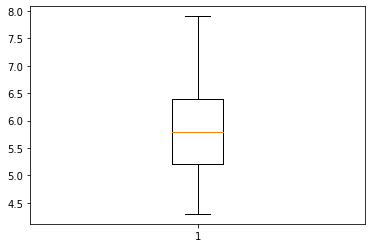

In [8]:
plt.boxplot(df["SL"])     #to check the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2c73f6a6b50>,
 'caps': [<matplotlib.lines.Line2D at 0x2c73f6b3280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c73f6a67f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c73f6b3940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c73f6b3ca0>],
 'means': []}

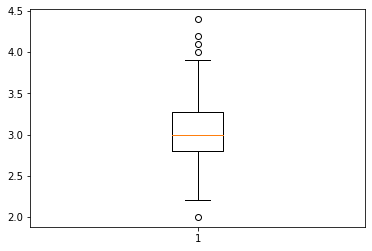

In [9]:
plt.boxplot(df["SW"]) 

{'whiskers': [<matplotlib.lines.Line2D at 0x2c73f711730>,
 'caps': [<matplotlib.lines.Line2D at 0x2c73f711df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c73f7113d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c73f71f4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c73f71f850>],
 'means': []}

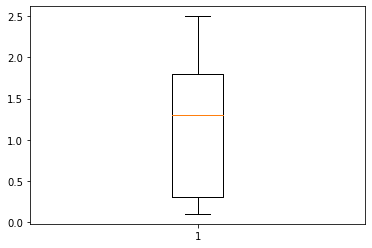

In [10]:
plt.boxplot(df["PW"]) 

{'whiskers': [<matplotlib.lines.Line2D at 0x2c73f775310>,
 'caps': [<matplotlib.lines.Line2D at 0x2c73f7759d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c73f766f70>],
 'medians': [<matplotlib.lines.Line2D at 0x2c73f7820d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c73f782430>],
 'means': []}

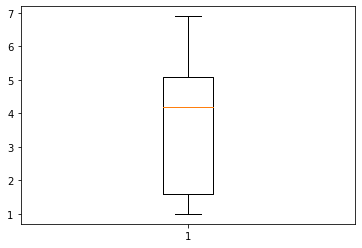

In [11]:
plt.boxplot(df["PL"]) 

In [12]:
#next to remove the outliers in SW colunm
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')   
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [13]:
#find IQR
IQR=Q3-Q1

In [14]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

2.1249999999999996
3.9250000000000003


In [15]:
outlier=[]
for x in df['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [16]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [17]:
ind1=df['SW']>up_lim
df.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [18]:
df=df.drop(df.loc[ind1].index)

In [19]:
ind2=df['SW']<low_lim
df.loc[ind2].index

Int64Index([60], dtype='int64')

In [20]:
df=df.drop(df.loc[ind2].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c73f82c040>,
 'caps': [<matplotlib.lines.Line2D at 0x2c73f82c6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c73f81eca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c73f82cd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c73f839100>],
 'means': []}

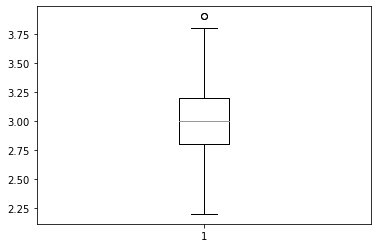

In [21]:
plt.boxplot(df["SW"])

In [22]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')   
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.2


In [23]:
IQR=Q3-Q1

In [24]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

2.1999999999999993
3.8000000000000007


In [25]:
outlier=[]
for x in df['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [26]:
outlier

[3.9, 3.9]

In [27]:
ind3=df['SW']>up_lim
df.loc[ind3].index

Int64Index([5, 16], dtype='int64')

In [28]:
df=df.drop(df.loc[ind3].index)

Text(0.5, 1.0, 'Box Plot of SW')

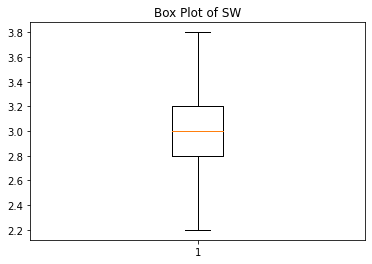

In [29]:
plt.boxplot(df["SW"])
plt.title("Box Plot of SW")

It remove all outliers

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [30]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [31]:
df.Classification.nunique()

3

In [32]:
y=pd.DataFrame(df['Classification'])    #split into x and y
X=df.drop(['Classification'],axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.3)


In [35]:
X_train.shape

(100, 4)

In [36]:
X_test.shape

(43, 4)

In [37]:
y_train.shape

(100, 1)

In [38]:
y_test.shape

(43, 1)

In [56]:
#Built the model

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf=RandomForestClassifier()

In [95]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

<ipython-input-95-e7065b8a00e2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [96]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,accuracy_score

In [97]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 12,  2],
       [ 0,  3, 10]], dtype=int64)

In [102]:
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,pos_label='positive',average='micro'))
print('accuracy:',accuracy_score(y_test,y_pred))

Precision Score :  0.9069767441860465
Recall Score :  0.9069767441860465
accuracy: 0.9069767441860465


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [ ]:
#Gradient Boosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

In [101]:
y_predt=gb.predict(X_test)
print("Precision Score : ",precision_score(y_test, y_predt, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_predt,pos_label='positive',average='micro'))
print('accuracy:',accuracy_score(y_test,y_predt))

Precision Score :  0.9069767441860465
Recall Score :  0.9069767441860465
accuracy: 0.9069767441860465


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [ ]:
#Decision Tree Classification

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred2=dt_model.predict(X_test)

In [106]:
print("Accuracy on Decision Tree model is:",accuracy_score(y_test,y_pred2))

Accuracy on Decision Tree model is: 0.9069767441860465


In [109]:
print("Precision Score : ",precision_score(y_test, y_pred2, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred2,pos_label='positive',average='micro'))

Precision Score :  0.9069767441860465
Recall Score :  0.9069767441860465


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [108]:
confusion_matrix(y_test,y_pred2)

array([[16,  0,  0],
       [ 0, 13,  1],
       [ 0,  3, 10]], dtype=int64)

In [ ]:
#linear SVM

In [110]:
from sklearn.svm import SVC

In [112]:
svm_linear=SVC(kernel="linear")

In [113]:
svm_linear.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [114]:
y_pred3=svm_linear.predict(X_test)

In [115]:
print("Accuracy using linear svm is", accuracy_score(y_test,y_pred3))

Accuracy using linear svm is 0.8837209302325582


In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
svm_linear=SVC(kernel="linear")
svm_linear.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [128]:
y_pred4=svm_linear.predict(X_test)
print("Accuracy is:",accuracy_score(y_test,y_pred4))

Accuracy is: 0.9302325581395349


In [ ]:
#Extreme GradientBoosting

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)

In [127]:
print("Accuracy is:",accuracy_score(y_test,y_pred5))

Accuracy is: 0.9069767441860465
